#  Clustering: KMeans
## USArrets dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

In [ ]:
from statsmodels.datasets import get_rdataset
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Dataset
`USArrests`, a data set in the `R` computing environment.
We retrieve the data using `get_rdataset()`, which can fetch data from many standard `R` packages.

The rows of the data set contain the 50 states, in alphabetical order.

In [ ]:
USArrests = get_rdataset("USArrests").data
USArrests.head()

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


The columns of the data set contain the four variables.

/var/folders/3d/z57b8w6d3711qq4c90ndg7fr0000gn/T/ipykernel_7163/1729978768.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot=plt.boxplot(USArrests,labels=USArrests.columns,patch_artist=True,)


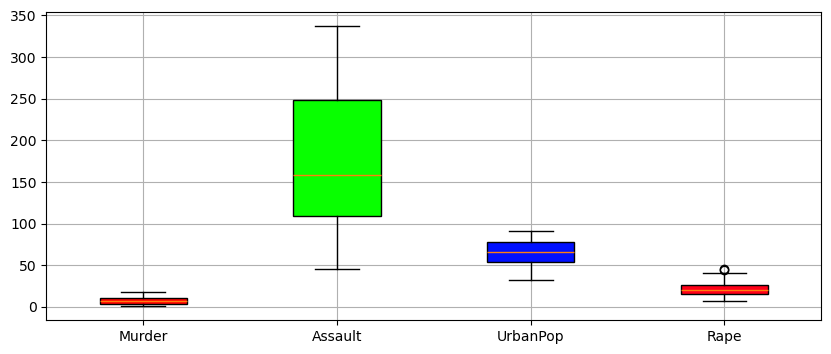

In [ ]:
colors = plt.cm.hsv(np.linspace(0, 1, USArrests.shape[1]))
plt.figure(figsize=(10, 4))
bplot = plt.boxplot(
    USArrests,
    labels=USArrests.columns,
    patch_artist=True,
)
# fill with colors
for patch, color in zip(bplot["boxes"], colors):
    patch.set_facecolor(color)
plt.grid("True")

## $K$-Means Clustering


### Perfom the clustering

The goal in this section is to obtain `K` clusters.

Question: 
- Is neccesary to normalize these data?
- Complete the code to perform clustering with KMeans for  𝑘=4 and 𝑘=6 clusters.

In [ ]:
# Kmeans K=4
# Answer: Add your own code here

scaler = StandardScaler(with_std=True, with_mean=True)
USArrests_scaled = scaler.fit_transform(USArrests)
USArrests_scaled
# Modelo
# ==============================================================================
kmeans1 = KMeans(n_clusters=4, n_init=25, random_state=123)
kmeans1.fit(X=USArrests_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,25
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


In [6]:
kmeans1.cluster_centers_

array([[ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

### Visualize the results

Plot the data with each observation colored according to its cluster assignment by means scatter plots and include the centroids.

Text(0, 0.5, 'Rape')

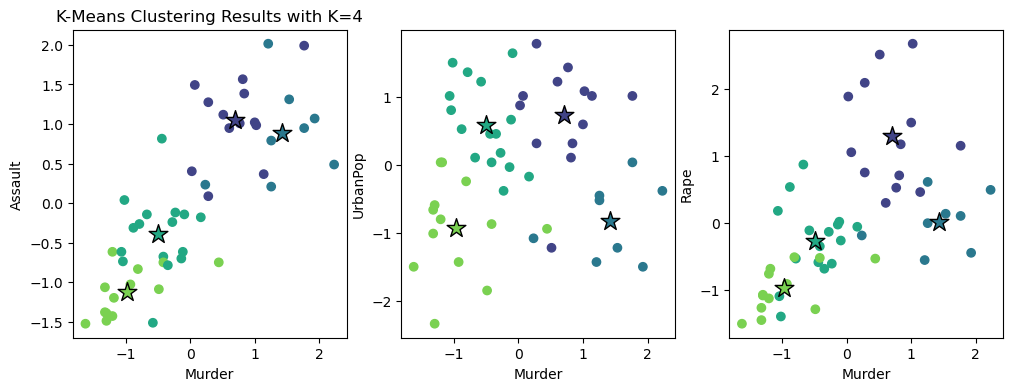

In [ ]:
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
colors = sns.color_palette("viridis", n_colors=kmeans1.n_clusters)
cluster_colors = [colors[label] for label in kmeans1.labels_]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 1], c=cluster_colors)
for i, color in enumerate(colors):
    ax[0].scatter(
        kmeans1.cluster_centers_[i, 0],
        kmeans1.cluster_centers_[i, 1],
        color=color,
        edgecolor="k",
        marker="*",
        s=200,
    )
ax[0].set_xlabel(USArrests.columns[0])
ax[0].set_ylabel(USArrests.columns[1])
ax[0].set_title("K-Means Clustering Results with K=4")
ax[1].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 2], c=cluster_colors)
for i, color in enumerate(colors):
    ax[1].scatter(
        kmeans1.cluster_centers_[i, 0],
        kmeans1.cluster_centers_[i, 2],
        color=color,
        edgecolor="k",
        marker="*",
        s=200,
    )
ax[1].set_xlabel(USArrests.columns[0])
ax[1].set_ylabel(USArrests.columns[2])

ax[2].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 3], c=cluster_colors)
for i, color in enumerate(colors):
    ax[2].scatter(
        kmeans1.cluster_centers_[i, 0],
        kmeans1.cluster_centers_[i, 3],
        color=color,
        edgecolor="k",
        marker="*",
        s=200,
    )
ax[2].set_xlabel(USArrests.columns[0])
ax[2].set_ylabel(USArrests.columns[3])

### Repeat the Kmeans with K=6

In [8]:
# Kmeans K=6
# Answer: Add your own code here

# Modelo
# ==============================================================================
kmeans2 = KMeans(n_clusters=6, n_init=25, random_state=123)
kmeans2.fit(X=USArrests_scaled)

,n_clusters,6
,init,'k-means++'
,n_init,25
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,123
,copy_x,True
,algorithm,'lloyd'


Text(0, 0.5, 'Rape')

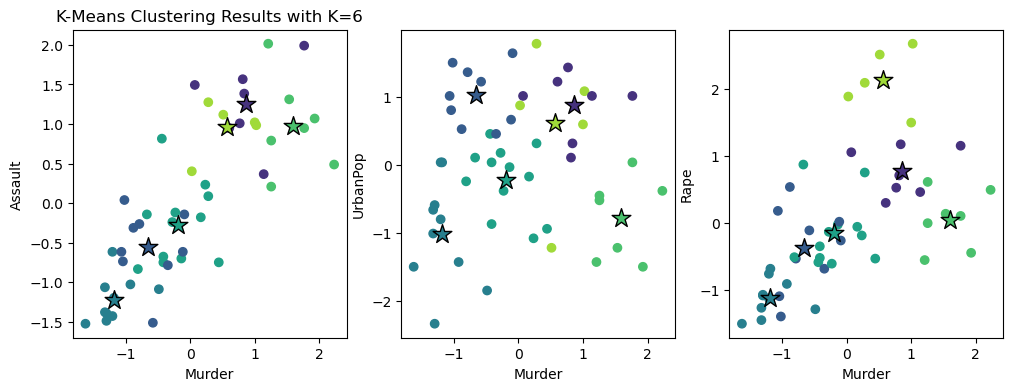

In [ ]:
# colors = ['red', 'blue', 'green', 'purple', 'orange', 'cyan']
colors = sns.color_palette("viridis", n_colors=kmeans2.n_clusters)
cluster_colors = [colors[label] for label in kmeans2.labels_]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))

ax[0].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 1], c=cluster_colors)
for i, color in enumerate(colors):
    ax[0].scatter(
        kmeans2.cluster_centers_[i, 0],
        kmeans2.cluster_centers_[i, 1],
        color=color,
        edgecolor="k",
        marker="*",
        s=200,
    )
ax[0].set_xlabel(USArrests.columns[0])
ax[0].set_ylabel(USArrests.columns[1])
ax[0].set_title("K-Means Clustering Results with K=6")
ax[1].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 2], c=cluster_colors)
for i, color in enumerate(colors):
    ax[1].scatter(
        kmeans2.cluster_centers_[i, 0],
        kmeans2.cluster_centers_[i, 2],
        color=color,
        edgecolor="k",
        marker="*",
        s=200,
    )
ax[1].set_xlabel(USArrests.columns[0])
ax[1].set_ylabel(USArrests.columns[2])

ax[2].scatter(USArrests_scaled[:, 0], USArrests_scaled[:, 3], c=cluster_colors)
for i, color in enumerate(colors):
    ax[2].scatter(
        kmeans2.cluster_centers_[i, 0],
        kmeans2.cluster_centers_[i, 3],
        color=color,
        edgecolor="k",
        marker="*",
        s=200,
    )
ax[2].set_xlabel(USArrests.columns[0])
ax[2].set_ylabel(USArrests.columns[3])

### Analyze the optimal number of clusters

a) Based on the total within-cluster sum of squares

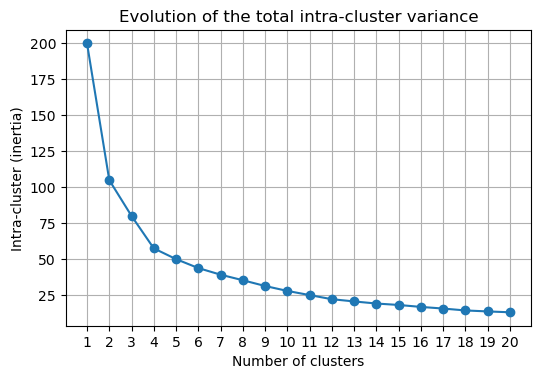

In [ ]:
# Answer: Add your own code here

# Método elbow para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(1, 21)
inertias = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
    modelo_kmeans.fit(USArrests_scaled)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, inertias, marker="o")
ax.set_xticks(range(min(range_n_clusters), max(range_n_clusters) + 1))

ax.set_title("Evolution of the total intra-cluster variance")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Intra-cluster (inertia)")
ax.grid("True")

b) Based on the silhoutte method

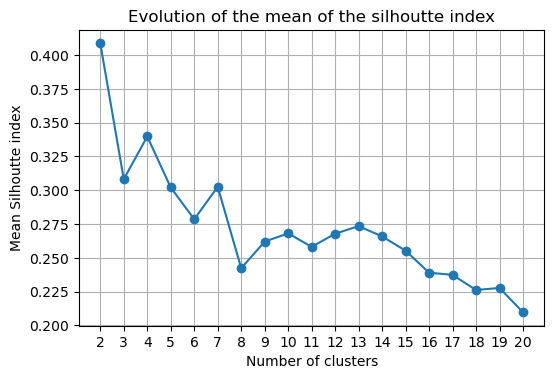

In [ ]:
# Answer: Add your own code here

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 21)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(n_clusters=n_clusters, n_init=20, random_state=123)
    cluster_labels = modelo_kmeans.fit_predict(USArrests_scaled)
    silhouette_avg = silhouette_score(USArrests_scaled, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker="o")
ax.set_xticks(range(min(range_n_clusters), max(range_n_clusters) + 1))
ax.set_title("Evolution of the mean of the silhoutte index")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Mean Silhoutte index")
ax.grid("True")

### Visualize the optimal result

In [ ]:
def plot_ellipse(ax, cluster_data, cluster_center, label, color):
    """
    Dibuja una elipse para un cluster en el gráfico dado.
    """
    cov = np.cov(cluster_data, rowvar=False)
    pearson = cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1])
    ellipse_radius_x = np.sqrt(1 + pearson)
    ellipse_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse(
        (0, 0),
        width=ellipse_radius_x * 2,
        height=ellipse_radius_y * 2,
        edgecolor=color,
        facecolor="none",
    )

    scale_x = np.sqrt(cov[0, 0]) * 2
    mean_x = cluster_center[0]

    scale_y = np.sqrt(cov[1, 1]) * 2
    mean_y = cluster_center[1]

    transf = (
        transforms.Affine2D()
        .rotate_deg(45)
        .scale(scale_x, scale_y)
        .translate(mean_x, mean_y)
    )
    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)
    ax.scatter(cluster_center[0], cluster_center[1], color=color, s=100, marker="X")
    ax.text(
        cluster_center[0],
        cluster_center[1],
        label,
        fontsize=12,
        ha="center",
        va="center",
        color=color,
    )


In [ ]:
labels = kmeans1.labels_
centroids_scaled = kmeans1.cluster_centers_

centroids = scaler.inverse_transform(centroids_scaled)

# Añadir los labels al DataFrame
USArrests["cluster"] = labels

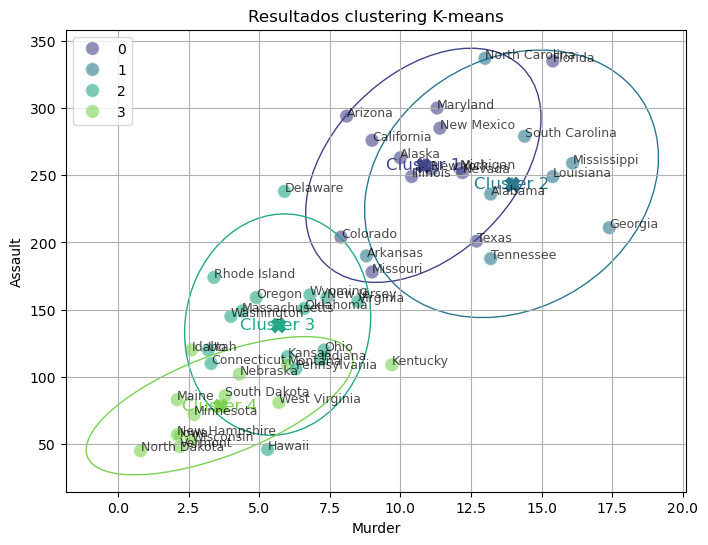

In [ ]:
# Visualización con seaborn y matplotlib
plt.figure(figsize=(8, 6))

# Colores para los clusters
palette = sns.color_palette("viridis", n_colors=kmeans1.n_clusters)

# Scatter plot de las observaciones
sns.scatterplot(
    data=USArrests,
    x="Murder",
    y="Assault",
    hue="cluster",
    palette=palette,
    s=100,
    alpha=0.6,
)

# Añadir las elipses y los centroides
for i in range(kmeans1.n_clusters):
    cluster_data = USArrests[USArrests["cluster"] == i][["Murder", "Assault"]].values
    cluster_center = centroids[i, [0, 1]]
    color = palette[i]
    plot_ellipse(plt.gca(), cluster_data, cluster_center, f"Cluster {i + 1}", color)

# Añadir etiquetas a las observaciones
for i, row in USArrests.iterrows():
    plt.text(row["Murder"], row["Assault"], i, fontsize=9, alpha=0.7)

# Añadir título y leyenda
plt.title("Resultados clustering K-means")
plt.legend()
plt.grid(True)
plt.show()